In [ ]:
import nb_setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from dataset_utils.mocap_labels import WALK_TRIALS, RUN_TRIALS
from gpdm import GPDM
import dataset_utils.select_joints as select_joints
import timeit

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.6.1 (SDL 2.30.7, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
reduced_columns = WALK_TRIALS[0].get_columns_for_joints(select_joints.WALKING_SIMPLIFIED_JOINTS)

In [3]:
d = 3 # latent space dimension
DOFs = len(reduced_columns)  # number of degrees of freedom

dyn_back_step = 1 # Number of time steps to look back in the dynamics GP

# Initial values for hyperparameters
y_lambdas_init = np.ones(DOFs)  # Signal standard deviation for observation GP
y_lengthscales_init = np.ones(d)  # Lengthscales for observation GP
y_sigma_n_init = 1e-2  # Noise standard deviation for observation GP

x_lambdas_init = np.ones(d)  # Signal standard deviation for latent dynamics GP
x_lengthscales_init = np.ones(dyn_back_step*d)  # Lengthscales for latent dynamics GP
x_sigma_n_init = 1e-2  # Noise standard deviation for latent dynamics GP
x_lin_coeff_init = np.ones(dyn_back_step*d + 1)  # Linear coefficients for latent dynamics GP

Training GPDM for subject 8 trial 2...
Elapsed time: 8.221533400006592


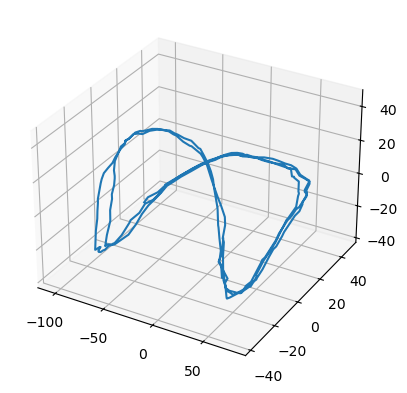

Training GPDM for subject 12 trial 1...
Elapsed time: 19.953015699982643


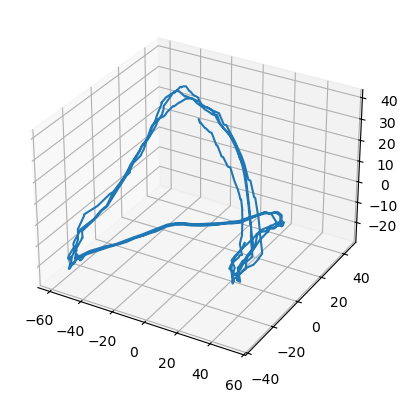

Training GPDM for subject 8 trial 7...
Elapsed time: 6.4703673999756575


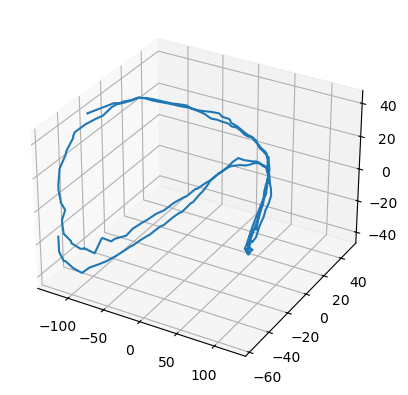

Training GPDM for subject 7 trial 5...
Elapsed time: 18.075277200201526


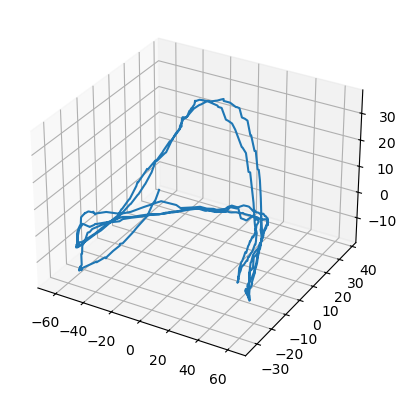

Training GPDM for subject 8 trial 3...
Elapsed time: 12.759828199865296


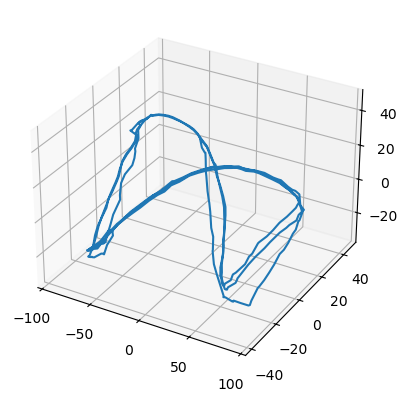

In [4]:

# Select 5 random trials and train a GPDM for each
# Then, plot the latent space for each trial

random_walk_mocaps = random.sample(WALK_TRIALS, 5)

walking_gpdm_trajectories = []
for mocap in random_walk_mocaps:

    print(f"Training GPDM for subject {mocap.subject} trial {mocap.trial}...")

    arr = mocap.as_dataframe()[reduced_columns].to_numpy().astype(np.float64)

    start_time = timeit.default_timer()
    gpdm = GPDM(
        D=DOFs,
        d=d,
        dyn_target='full',
        dyn_back_step=dyn_back_step,
        y_lambdas_init=y_lambdas_init,
        y_lengthscales_init=y_lengthscales_init,
        y_sigma_n_init=y_sigma_n_init,
        x_lambdas_init=x_lambdas_init,
        x_lengthscales_init=x_lengthscales_init,
        x_sigma_n_init=x_sigma_n_init,
        x_lin_coeff_init=x_lin_coeff_init
    )
    gpdm.add_data(arr)
    gpdm.init_X()
    gpdm.train_adam(100, 0, 1e-2)
    latent_trajectory = gpdm.X.clone().detach().numpy()
    end_time = timeit.default_timer()
    print(f"Elapsed time: {end_time - start_time}")
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(latent_trajectory[:, 0], latent_trajectory[:, 1], latent_trajectory[:, 2])
    plt.show()



Training GPDM for subject 9 trial 6...

### Model Training (Adam) ###

GPDM Opt. EPOCH: 0
Running loss: 3.6954e+06
Update time: 0.014787912368774414

GPDM Opt. EPOCH: 10
Running loss: 3.0006e+06
Update time: 0.16570138931274414

GPDM Opt. EPOCH: 20
Running loss: 2.4360e+06
Update time: 0.16638517379760742

GPDM Opt. EPOCH: 30
Running loss: 1.9813e+06
Update time: 0.16439032554626465

GPDM Opt. EPOCH: 40
Running loss: 1.6210e+06
Update time: 0.15253543853759766

GPDM Opt. EPOCH: 50
Running loss: 1.3457e+06
Update time: 0.25551724433898926

GPDM Opt. EPOCH: 60
Running loss: 1.1413e+06
Update time: 0.1753063201904297

GPDM Opt. EPOCH: 70
Running loss: 9.8461e+05
Update time: 0.13353705406188965

GPDM Opt. EPOCH: 80
Running loss: 8.5633e+05
Update time: 0.11649703979492188

GPDM Opt. EPOCH: 90
Running loss: 7.4564e+05
Update time: 0.11645650863647461
Elapsed time: 1.5993923000060022


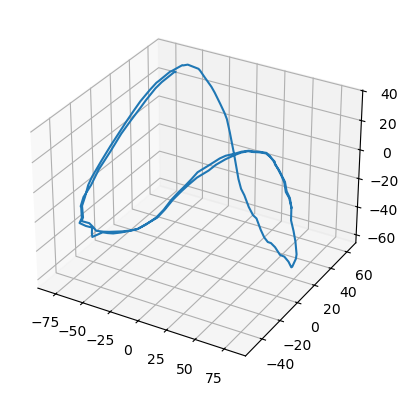

Training GPDM for subject 2 trial 3...

### Model Training (Adam) ###

GPDM Opt. EPOCH: 0
Running loss: 4.6108e+06
Update time: 0.0335237979888916

GPDM Opt. EPOCH: 10
Running loss: 3.7585e+06
Update time: 0.29981565475463867

GPDM Opt. EPOCH: 20
Running loss: 3.0729e+06
Update time: 0.24999403953552246

GPDM Opt. EPOCH: 30
Running loss: 2.5219e+06
Update time: 0.25008082389831543

GPDM Opt. EPOCH: 40
Running loss: 2.0809e+06
Update time: 0.23666834831237793

GPDM Opt. EPOCH: 50
Running loss: 1.7265e+06
Update time: 0.21320843696594238

GPDM Opt. EPOCH: 60
Running loss: 1.4378e+06
Update time: 0.15013384819030762

GPDM Opt. EPOCH: 70
Running loss: 1.2000e+06
Update time: 0.16666507720947266

GPDM Opt. EPOCH: 80
Running loss: 9.9774e+05
Update time: 0.16645479202270508

GPDM Opt. EPOCH: 90
Running loss: 8.2239e+05
Update time: 0.15002226829528809
Elapsed time: 2.0739718000404537


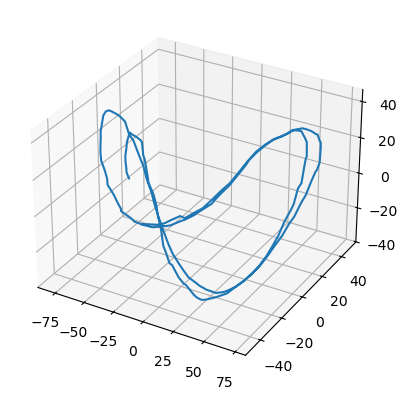

Training GPDM for subject 35 trial 22...

### Model Training (Adam) ###

GPDM Opt. EPOCH: 0
Running loss: 4.8959e+06
Update time: 0.0166015625

GPDM Opt. EPOCH: 10
Running loss: 4.0109e+06
Update time: 0.20205068588256836

GPDM Opt. EPOCH: 20
Running loss: 3.3005e+06
Update time: 0.2146766185760498

GPDM Opt. EPOCH: 30
Running loss: 2.7324e+06
Update time: 0.24974727630615234

GPDM Opt. EPOCH: 40
Running loss: 2.2747e+06
Update time: 0.26273345947265625

GPDM Opt. EPOCH: 50
Running loss: 1.8983e+06
Update time: 0.18745994567871094

GPDM Opt. EPOCH: 60
Running loss: 1.5779e+06
Update time: 0.14989304542541504

GPDM Opt. EPOCH: 70
Running loss: 1.3018e+06
Update time: 0.13326025009155273

GPDM Opt. EPOCH: 80
Running loss: 1.0737e+06
Update time: 0.15004277229309082

GPDM Opt. EPOCH: 90
Running loss: 8.8758e+05
Update time: 0.13332390785217285
Elapsed time: 1.8786053999792784


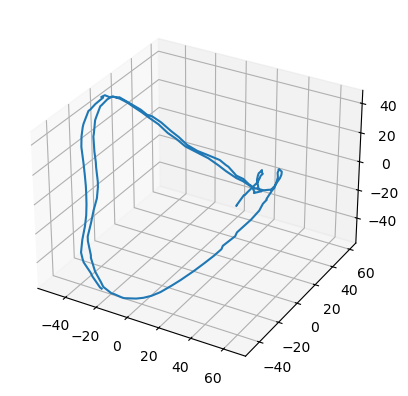

Training GPDM for subject 9 trial 4...

### Model Training (Adam) ###

GPDM Opt. EPOCH: 0
Running loss: 3.5808e+06
Update time: 0.019283771514892578

GPDM Opt. EPOCH: 10
Running loss: 2.8872e+06
Update time: 0.13085246086120605

GPDM Opt. EPOCH: 20
Running loss: 2.3456e+06
Update time: 0.20012640953063965

GPDM Opt. EPOCH: 30
Running loss: 1.9283e+06
Update time: 0.20026159286499023

GPDM Opt. EPOCH: 40
Running loss: 1.6059e+06
Update time: 0.23298239707946777

GPDM Opt. EPOCH: 50
Running loss: 1.3541e+06
Update time: 0.2979865074157715

GPDM Opt. EPOCH: 60
Running loss: 1.1577e+06
Update time: 0.2186298370361328

GPDM Opt. EPOCH: 70
Running loss: 1.0012e+06
Update time: 0.33690810203552246

GPDM Opt. EPOCH: 80
Running loss: 8.7162e+05
Update time: 0.13195586204528809

GPDM Opt. EPOCH: 90
Running loss: 7.6211e+05
Update time: 0.12086367607116699
Elapsed time: 2.0065572999883443


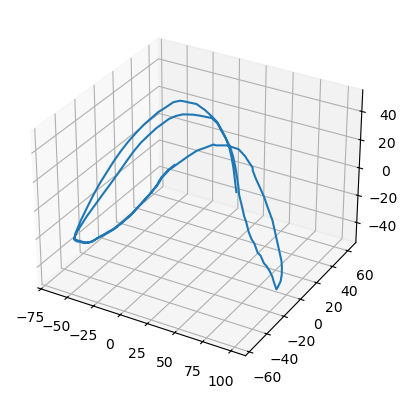

Training GPDM for subject 9 trial 10...

### Model Training (Adam) ###

GPDM Opt. EPOCH: 0
Running loss: 1.6094e+08
Update time: 0.01678919792175293

GPDM Opt. EPOCH: 10
Running loss: 2.9524e+06
Update time: 0.13538789749145508

GPDM Opt. EPOCH: 20
Running loss: 2.2912e+06
Update time: 0.1313469409942627

GPDM Opt. EPOCH: 30
Running loss: 1.8439e+06
Update time: 0.14983725547790527

GPDM Opt. EPOCH: 40
Running loss: 1.5058e+06
Update time: 0.10001063346862793

GPDM Opt. EPOCH: 50
Running loss: 1.2499e+06
Update time: 0.1186363697052002

GPDM Opt. EPOCH: 60
Running loss: 1.0542e+06
Update time: 0.11712956428527832

GPDM Opt. EPOCH: 70
Running loss: 9.0089e+05
Update time: 0.10658121109008789

GPDM Opt. EPOCH: 80
Running loss: 7.7368e+05
Update time: 0.1699967384338379

GPDM Opt. EPOCH: 90
Running loss: 6.6178e+05
Update time: 0.16782760620117188
Elapsed time: 1.3168462999165058


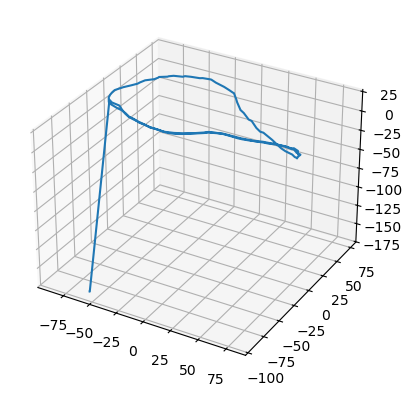

In [5]:
# Repeat for running trials

random_run_mocaps = random.sample(RUN_TRIALS, 5)

running_gpdm_trajectories = []
for mocap in random_run_mocaps:

    print(f"Training GPDM for subject {mocap.subject} trial {mocap.trial}...")

    arr = mocap.as_dataframe()[reduced_columns].to_numpy().astype(np.float64)

    start_time = timeit.default_timer()
    gpdm = GPDM(
        D=DOFs,
        d=d,
        dyn_target='full',
        dyn_back_step=dyn_back_step,
        y_lambdas_init=y_lambdas_init,
        y_lengthscales_init=y_lengthscales_init,
        y_sigma_n_init=y_sigma_n_init,
        x_lambdas_init=x_lambdas_init,
        x_lengthscales_init=x_lengthscales_init,
        x_sigma_n_init=x_sigma_n_init,
        x_lin_coeff_init=x_lin_coeff_init
    )
    gpdm.add_data(arr)
    gpdm.init_X()
    gpdm.train_adam(100, 10, 1e-2)
    latent_trajectory = gpdm.X.clone().detach().numpy()
    end_time = timeit.default_timer()
    print(f"Elapsed time: {end_time - start_time}")
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(latent_trajectory[:, 0], latent_trajectory[:, 1], latent_trajectory[:, 2])
    plt.show()
